In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

2024-03-07 11:48:58.684942: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-07 11:48:58.762212: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
def load_samples(path, change_order=False):
    root, _ = os.path.splitext(path)
    if change_order:
        X = np.load(f'{root}-data.npy').transpose(0, 2, 3, 1)   
    else:
        X = np.load(f'{root}-data.npy')
    Y = np.load(f'{root}-label.npy')
    return X, Y

In [3]:
def get_highest_accuracy(y_true, y_pred):
    _, _, thresholds = roc_curve(y_true, y_pred)
    # compute highest accuracy
    thresholds = np.array(thresholds)
    if len(thresholds) > 1000:
        thresholds = np.percentile(thresholds, np.linspace(0, 100, 1001))
    accuracy_scores = []
    for threshold in thresholds:
        accuracy_scores.append(accuracy_score(y_true, y_pred>threshold))

    accuracies = np.array(accuracy_scores)
    return accuracies.max()

## Plot ROC

In [4]:
def plot_AUC_curve(model_path, X, y, model_name, **kwargs):
    loaded_model = tf.keras.models.load_model(model_path)
    y_pred = loaded_model.predict(X)
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    auc = roc_auc_score(y, y_pred)

    acc = get_highest_accuracy(y, y_pred)
    # ax.plot(fpr, tpr, label=f'AUC = {auc:.3f}, ACC = {acc:.3f}, {model_name}', **kwargs)
    ax.plot(fpr, tpr, label=f'{model_name}', **kwargs)


In [5]:
sample_dir = f'../Sample/HVmodel/data/new/mix_sample_testing.npy'
X_test, y_test = load_samples(sample_dir)

2024-03-07 11:49:05.518327: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-07 11:49:06.128366: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22288 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:d8:00.0, compute capability: 8.6
2024-03-07 11:49:09.677219: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401


 32/625 [>.............................] - ETA: 2s

2024-03-07 11:49:11.168426: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


625/625 [==============================] - 3s 5ms/step


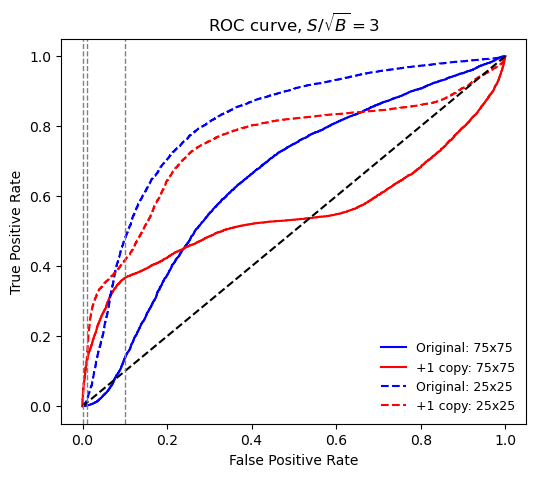

In [6]:
# Plot ROC curve
fig, ax = plt.subplots(1,1, figsize=(6,5))

i = 3
sample_dir = f'../Sample/HVmodel/data/new/mix_sample_testing.npy'
X_test, y_test = load_samples(sample_dir)
plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_2_image/', X_test, y_test, f'Original: 75x75', color='b')
plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_copy_1_2_image/', X_test, y_test, f'+1 copy: 75x75', color='r')

sample_dir = f'../Sample/HVmodel/data/new/mix_sample_testing_25x25.npy'
X_test, y_test = load_samples(sample_dir)
plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_2_image_25x25/', X_test, y_test, f'Original: 25x25', linestyle='--', color='b')
plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_copy_1_2_image_25x25/', X_test, y_test, f'+1 copy: 25x25', linestyle='--', color='r')

ax.plot([0, 1], [0, 1], 'k--')

ax.axvline(x=0.1, color='grey', linestyle='--', linewidth=1)
ax.axvline(x=0.01, color='grey', linestyle='--', linewidth=1)
ax.axvline(x=0.001, color='grey', linestyle='--', linewidth=1)

# log scale
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve, $S / \sqrt{B}=3$')
ax.legend(frameon=False, fontsize=9)

plt.savefig('../figures/HVmodel_roc_curve_origin_copy_1_SB_3_res_75_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

625/625 [==============================] - 3s 5ms/step


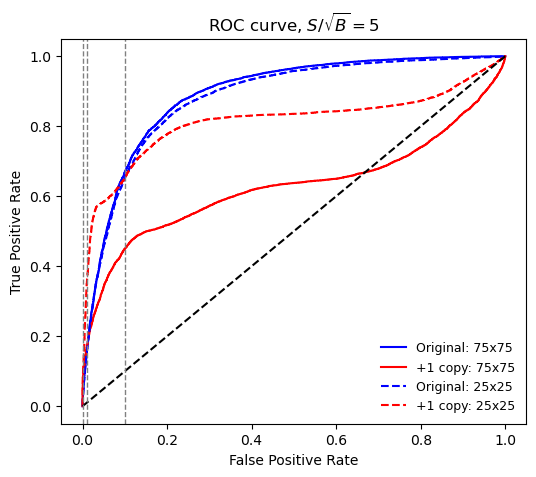

In [7]:
# Plot ROC curve
fig, ax = plt.subplots(1,1, figsize=(6,5))

i = 5
sample_dir = f'../Sample/HVmodel/data/new/mix_sample_testing.npy'
X_test, y_test = load_samples(sample_dir)
plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_2_image/', X_test, y_test, f'Original: 75x75', color='b')
plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_copy_1_2_image/', X_test, y_test, f'+1 copy: 75x75', color='r')

sample_dir = f'../Sample/HVmodel/data/new/mix_sample_testing_25x25.npy'
X_test, y_test = load_samples(sample_dir)
plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_2_image_25x25/', X_test, y_test, f'Original: 25x25', linestyle='--', color='b')
plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_copy_1_2_image_25x25/', X_test, y_test, f'+1 copy: 25x25', linestyle='--', color='r')

ax.plot([0, 1], [0, 1], 'k--')

ax.axvline(x=0.1, color='grey', linestyle='--', linewidth=1)
ax.axvline(x=0.01, color='grey', linestyle='--', linewidth=1)
ax.axvline(x=0.001, color='grey', linestyle='--', linewidth=1)

# log scale
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve, $S / \sqrt{B}=5$')
ax.legend(frameon=False, fontsize=9)

plt.savefig('../figures/HVmodel_roc_curve_origin_copy_1_SB_5_res_75_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

625/625 [==============================] - 3s 5ms/step


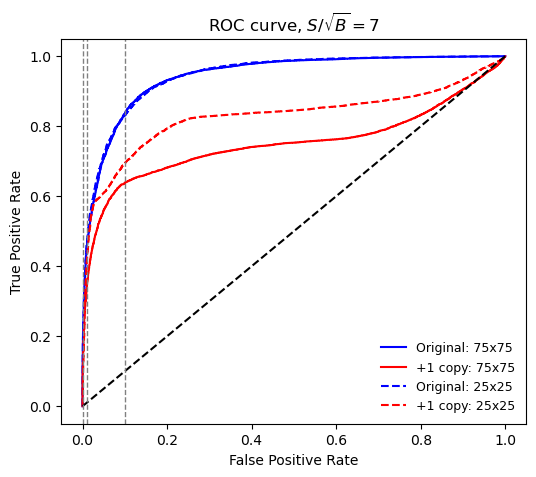

In [8]:
# Plot ROC curve
fig, ax = plt.subplots(1,1, figsize=(6,5))

i = 7
sample_dir = f'../Sample/HVmodel/data/new/mix_sample_testing.npy'
X_test, y_test = load_samples(sample_dir)
plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_2_image/', X_test, y_test, f'Original: 75x75', color='b')
plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_copy_1_2_image/', X_test, y_test, f'+1 copy: 75x75', color='r')

sample_dir = f'../Sample/HVmodel/data/new/mix_sample_testing_25x25.npy'
X_test, y_test = load_samples(sample_dir)
plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_2_image_25x25/', X_test, y_test, f'Original: 25x25', linestyle='--', color='b')
plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_copy_1_2_image_25x25/', X_test, y_test, f'+1 copy: 25x25', linestyle='--', color='r')

ax.plot([0, 1], [0, 1], 'k--')

ax.axvline(x=0.1, color='grey', linestyle='--', linewidth=1)
ax.axvline(x=0.01, color='grey', linestyle='--', linewidth=1)
ax.axvline(x=0.001, color='grey', linestyle='--', linewidth=1)

# log scale
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve, $S / \sqrt{B}=7$')
ax.legend(frameon=False, fontsize=9)

plt.savefig('../figures/HVmodel_roc_curve_origin_copy_1_SB_7_res_75_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

625/625 [==============================] - 4s 6ms/step


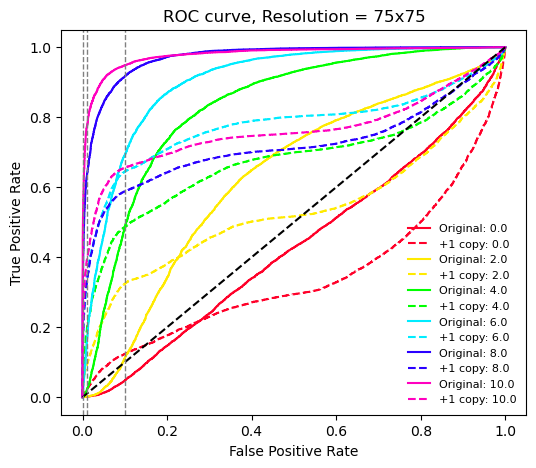

In [9]:
# Plot ROC curve
sample_dir = f'../Sample/HVmodel/data/new/mix_sample_testing.npy'
X_test, y_test = load_samples(sample_dir)

fig, ax = plt.subplots(1,1, figsize=(6,5))

for i in range(0, 11, 2):
    plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_2_image/', X_test, y_test, f'Original: {i:.1f}', color=plt.cm.gist_rainbow(i*0.1))
    plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_copy_1_2_image/', X_test, y_test, f'+1 copy: {i:.1f}', color=plt.cm.gist_rainbow(i*0.1), linestyle='--')

ax.plot([0, 1], [0, 1], 'k--')

ax.axvline(x=0.1, color='grey', linestyle='--', linewidth=1)
ax.axvline(x=0.01, color='grey', linestyle='--', linewidth=1)
ax.axvline(x=0.001, color='grey', linestyle='--', linewidth=1)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve, Resolution = 75x75')
ax.legend(frameon=False, fontsize=8)

plt.savefig('../figures/HVmodel_roc_curve_origin_copy_1_res_75.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

625/625 [==============================] - 3s 5ms/step


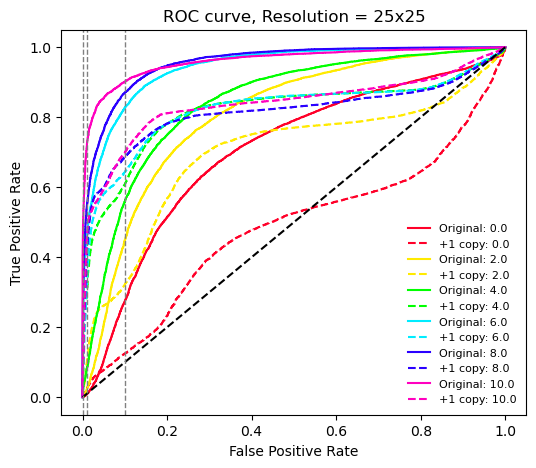

In [10]:
# Plot ROC curve
sample_dir = f'../Sample/HVmodel/data/new/mix_sample_testing_25x25.npy'
X_test, y_test = load_samples(sample_dir)

fig, ax = plt.subplots(1,1, figsize=(6,5))

for i in range(0, 11, 2):
    plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_2_image_25x25/', X_test, y_test, f'Original: {i:.1f}', color=plt.cm.gist_rainbow(i*0.1))
    plot_AUC_curve(f'./CNN_models/CNN_best_model_CWoLa_hunting_SB_{i:.1f}_copy_1_2_image_25x25/', X_test, y_test, f'+1 copy: {i:.1f}', color=plt.cm.gist_rainbow(i*0.1), linestyle='--')

ax.plot([0, 1], [0, 1], 'k--')

ax.axvline(x=0.1, color='grey', linestyle='--', linewidth=1)
ax.axvline(x=0.01, color='grey', linestyle='--', linewidth=1)
ax.axvline(x=0.001, color='grey', linestyle='--', linewidth=1)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve, Resolution = 25x25')
ax.legend(frameon=False, fontsize=8)

plt.savefig('../figures/HVmodel_roc_curve_origin_copy_1_res_25.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()